In [35]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [36]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [37]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2025-01-02 09:19:39.005297')

In [38]:
btc = get_historic_price('btc', after=last_week)

In [39]:
eth = get_historic_price('eth', after=last_week)

**Bitcoin:**

In [40]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-01-02 10:00:00,96600.0,96607.5,96500.0,96561.1,39.295190
2025-01-02 11:00:00,96561.1,96700.0,96363.0,96558.3,65.915955
2025-01-02 12:00:00,96558.3,96725.6,96500.1,96725.6,49.108228
2025-01-02 13:00:00,96725.6,96767.3,96324.6,96328.1,66.255740
2025-01-02 14:00:00,96328.1,97258.6,95900.3,97132.4,151.226253


In [41]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2025-01-02 10:00:00 to 2025-01-09 12:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   171 non-null    float64
 1   HighPrice   171 non-null    float64
 2   LowPrice    171 non-null    float64
 3   ClosePrice  171 non-null    float64
 4   Volume      171 non-null    float64
dtypes: float64(5)
memory usage: 8.0 KB


In [42]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,97716.277778,97967.385380,97441.967836,97698.509357,69.929308
std,2142.679528,2134.718321,2212.656935,2164.104330,90.485278
min,92944.100000,93360.400000,92501.000000,92944.100000,2.457123
25%,96512.600000,96732.750000,96324.050000,96499.550000,18.511417
50%,97778.100000,97974.000000,97632.200000,97778.000000,35.413784
75%,98442.950000,98707.400000,98283.750000,98442.900000,83.678450
max,102222.000000,102759.300000,102037.400000,102222.000000,556.921556


<Axes: xlabel='CloseTime'>

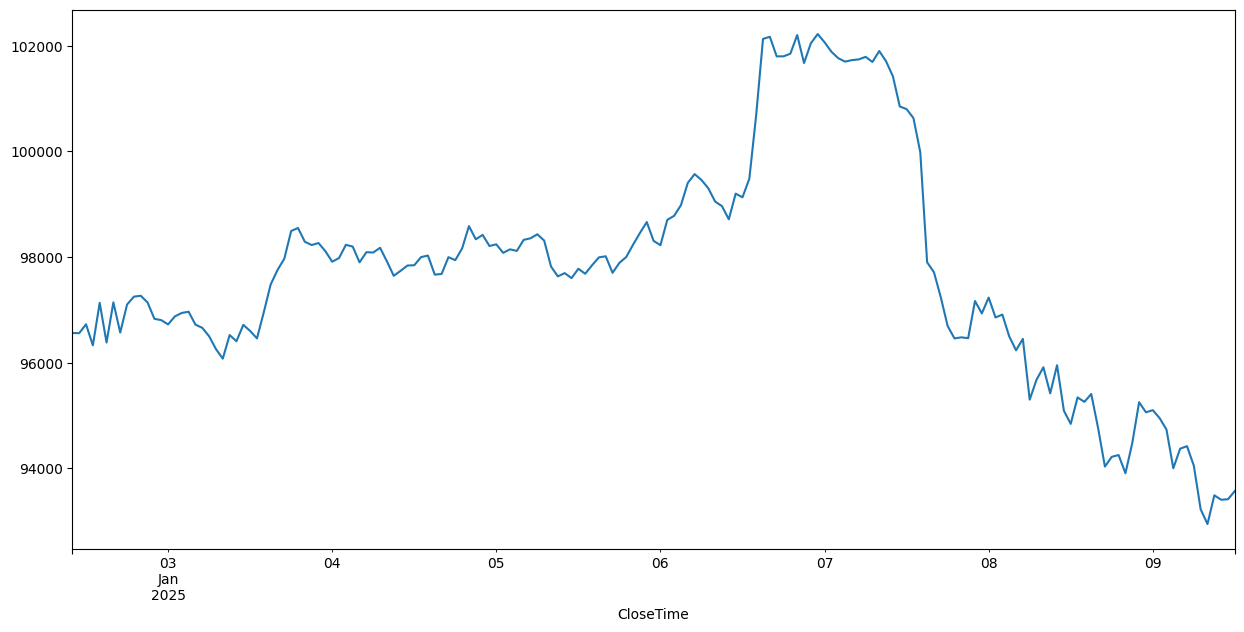

In [43]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [44]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-01-02 10:00:00,3464.62,3469.87,3456.78,3464.13,704.272257
2025-01-02 11:00:00,3464.12,3470.00,3453.92,3467.64,730.796412
2025-01-02 12:00:00,3467.18,3476.05,3463.51,3474.33,887.383141
2025-01-02 13:00:00,3474.33,3479.67,3457.20,3461.65,425.058971
2025-01-02 14:00:00,3461.65,3502.89,3437.81,3490.09,706.751244


In [45]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,3529.726550,3542.308421,3516.001345,3528.813333,627.731595
std,131.800729,129.961165,135.185452,132.812731,870.800840
min,3261.730000,3289.600000,3210.730000,3262.210000,30.383394
25%,3428.795000,3440.930000,3413.645000,3423.005000,166.191839
50%,3593.920000,3601.410000,3583.810000,3593.920000,384.330366
75%,3639.920000,3649.370000,3631.120000,3639.915000,734.777783
max,3713.120000,3742.250000,3691.440000,3713.120000,7243.841973


<Axes: xlabel='CloseTime'>

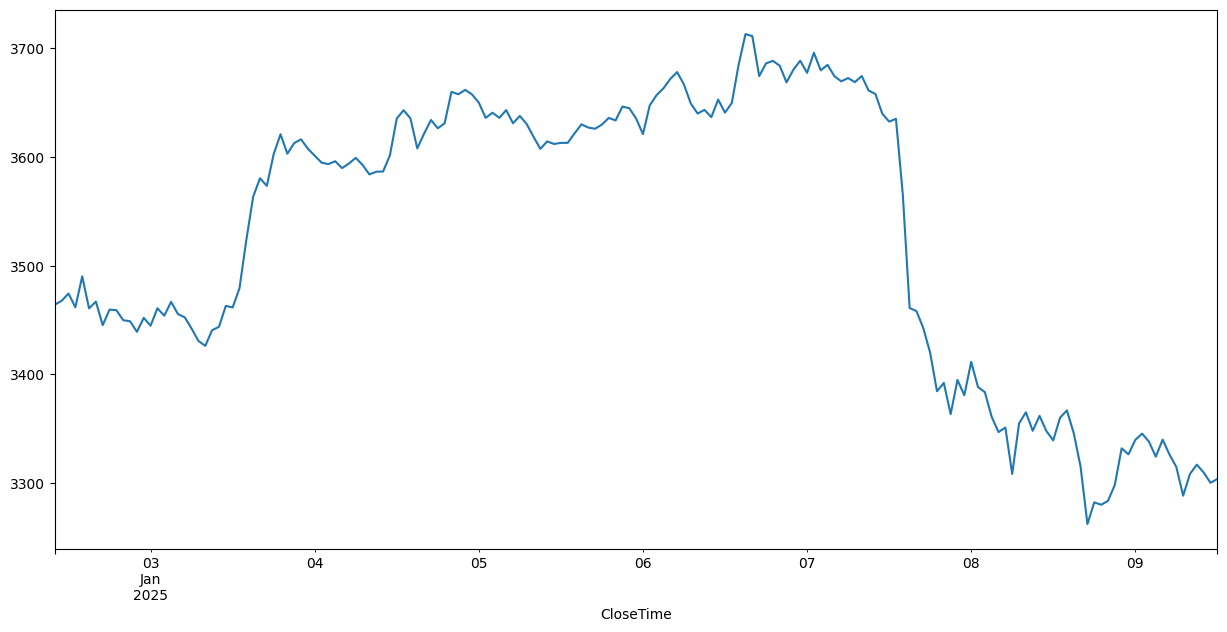

In [46]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [47]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-01-02 10:00:00,3464.62,3469.87,3456.78,3464.13,704.272257
2025-01-02 11:00:00,3464.12,3470.00,3453.92,3467.64,730.796412
2025-01-02 12:00:00,3467.18,3476.05,3463.51,3474.33,887.383141
2025-01-02 13:00:00,3474.33,3479.67,3457.20,3461.65,425.058971
2025-01-02 14:00:00,3461.65,3502.89,3437.81,3490.09,706.751244


In [48]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [49]:
output_notebook()

Loading BokehJS ...

In [50]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [51]:
with pd.ExcelWriter('cryptos.xlsx') as writer:
    btc.to_excel(writer, sheet_name='Bitcoin')
    eth.to_excel(writer, sheet_name='Ether')